# Week 4: Decision Trees
# Rasika Bhalerao

# Agenda

- Entropy (as a measure of impurity) and information gain
- The importance of interpretable ML
- [Discuss any async questions](https://docs.google.com/presentation/d/1UljNHlGTo7mDtn9sQUVHRhx5Uc9UqekF4jSLXevfgMs/edit?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

# For visualizing the tree
from sklearn import tree
from IPython.core.display import Image, display
import pydot
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

Defining a decision tree:
- Each node of the tree is a collection of data points
- The tree root has all the data points in it
- A node's children are the collections you get when you split the parent node's collection based on a feature value
  - (e.g. one child gets all x < 5, other child gets all x >= 5, where x is some feature)
- The decision tree is trained (the splits are decided) by splitting each node's data on the feature that results in the largest Information Gain (IG)

In [ ]:
# Example: automated content moderation on our (fake) forum!

# For this example, I have picked pieces of 10 comments from various sources,
# mostly the Kaggle toxic comment classification challenge
# (https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

# I have replaced all profanity with <profanity>
# (this can be done with a predetermined word list)

# 1 means labelers deemed it unacceptable for our forum, 0 means it is fine

df = pd.DataFrame({
    'comment': [
        'Yo <profanity> Ja Rule is more succesful then you\'ll ever be',
        'Please do not add nonsense to Wikipedia.',
        'His <profanity> is gonna get fired.',
        'I WILL <profanity> IF YOU REVOKE MY TALK PAGE ACCESS!!!!!!!!!!!!!',
        'That\'s my <profanity>',
        'Wassup <profanity>',
        'Her body is perfect. Face, hips, all of it.',
        '<profanity> off my <profanity> you <profanity> <profanity> pig <profanity>.',
        'This is just bizarre. WTF?',
        'HI FRANKIE HOW ARE YOU I HEARD YOU LIKE TO <profanity> <profanity> <profanity>'
    ],
    'label': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
})

df.head(len(df))

,comment,label
0,Yo <profanity> Ja Rule is more succesful then ...,1
1,Please do not add nonsense to Wikipedia.,0
2,His <profanity> is gonna get fired.,1
3,I WILL <profanity> IF YOU REVOKE MY TALK PAGE ...,1
4,That's my <profanity>,0
5,Wassup <profanity>,1
6,"Her body is perfect. Face, hips, all of it.",0
7,<profanity> off my <profanity> you <profanity>...,1
8,This is just bizarre. WTF?,0
9,HI FRANKIE HOW ARE YOU I HEARD YOU LIKE TO <pr...,1


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['comment'])
print(vectorizer.get_feature_names())
print(X.toarray())

['access', 'add', 'all', 'are', 'be', 'bizarre', 'body', 'do', 'ever', 'face', 'fired', 'frankie', 'get', 'gonna', 'heard', 'her', 'hi', 'hips', 'his', 'how', 'if', 'is', 'it', 'ja', 'just', 'like', 'll', 'more', 'my', 'nonsense', 'not', 'of', 'off', 'page', 'perfect', 'pig', 'please', 'profanity', 'revoke', 'rule', 'succesful', 'talk', 'that', 'then', 'this', 'to', 'wassup', 'wikipedia', 'will', 'wtf', 'yo', 'you']
[[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0
  0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

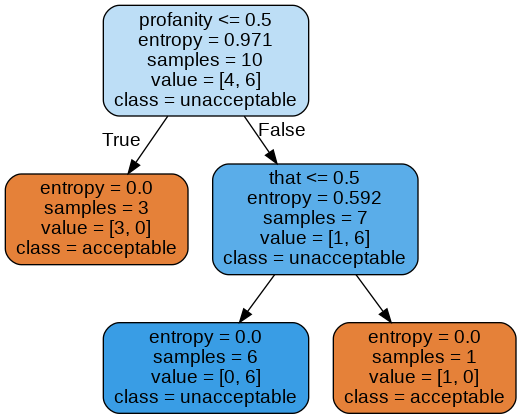

In [ ]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, df['label'])

# Output a visualization of it to tree.png
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
                     class_names=['acceptable', 'unacceptable'], 
                     feature_names=vectorizer.get_feature_names(),
                     out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# Display tree.png here
Image(filename='tree.png')

Discussion:
- Interpretable ML is important, especially in situations like this. Inspecting this tree, any ideas why?
- What are some sources of bias here?
  - Hint: labels for training data are often crowdsourced
  - Hint: there are many answers here!